In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors

In [44]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [45]:
df = df.rename(columns={
    'CustomerID': 'customer_id',
    'Gender': 'gender',
    'Age': 'age',
    'Annual Income (k$)': 'income',
    'Spending Score (1-100)': 'spending_score'
})
df

,customer_id,gender,age,income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   income          200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [47]:
df.describe().astype(int)

,customer_id,age,income,spending_score
count,200,200,200,200
mean,100,38,60,50
std,57,13,26,25
min,1,18,15,1
25%,50,28,41,34
50%,100,36,61,50
75%,150,49,78,73
max,200,70,137,99


In [48]:
df.gender.value_counts()

gender
Female    112
Male       88
Name: count, dtype: int64

<Axes: xlabel='spending_score', ylabel='Percent'>

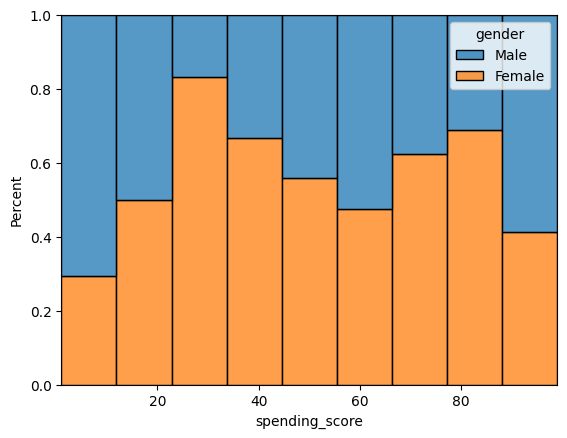

In [49]:
sns.histplot(data=df, x='spending_score', hue='gender', stat='percent', multiple='fill')

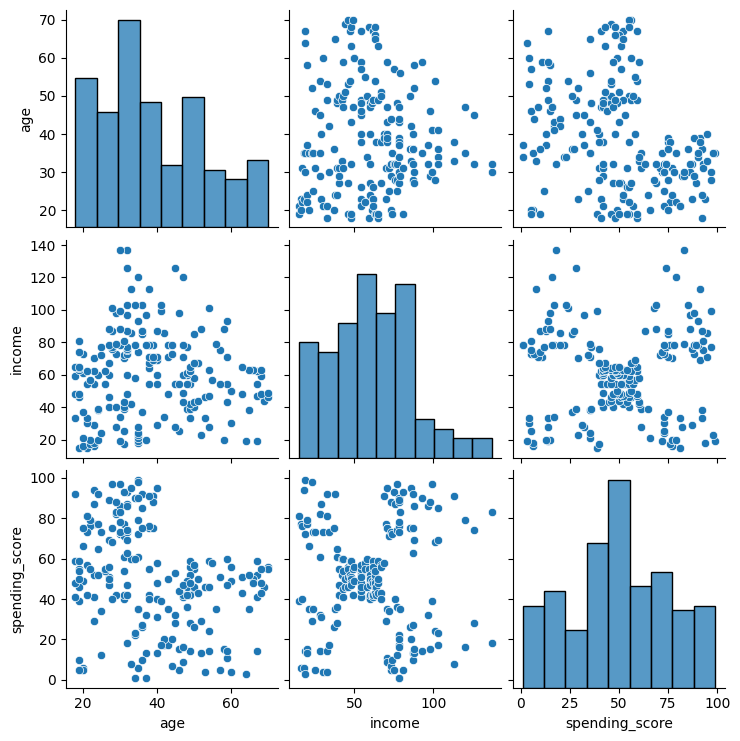

In [50]:
sns.pairplot(df.drop('customer_id', axis=1))

In [51]:
df.drop(columns=['customer_id', 'gender'], axis=1, inplace=True)

In [52]:
df

,age,income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [56]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,age,income,spending_score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [57]:
df_scaled.describe()

,age,income,spending_score
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


In [58]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_scaled)

KMeans(n_clusters=3)

In [60]:
kmeans.labels_, len(kmeans.labels_)

(array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
        0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
        0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
        0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
        2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
        0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1,
        2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 1], dtype=int32),
 200)

In [62]:
df_labeled = df.copy()
df_labeled['label'] = kmeans.labels_
df_labeled

,age,income,spending_score,label
0,19,15,39,2
1,21,15,81,2
2,20,16,6,2
3,23,16,77,2
4,31,17,40,2
...,...,...,...,...
195,35,120,79,1
196,45,126,28,1
197,32,126,74,1
198,32,137,18,1


In [64]:
df_labeled.label.value_counts()

label
0    91
2    64
1    45
Name: count, dtype: int64

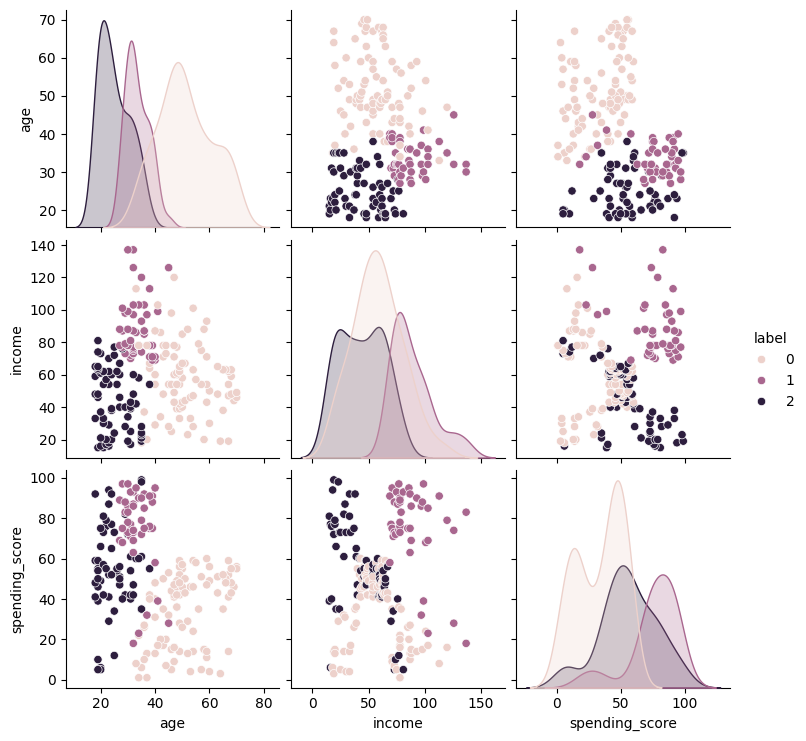

In [65]:
sns.pairplot(data=df_labeled, hue='label')

<Axes: xlabel='label', ylabel='income'>

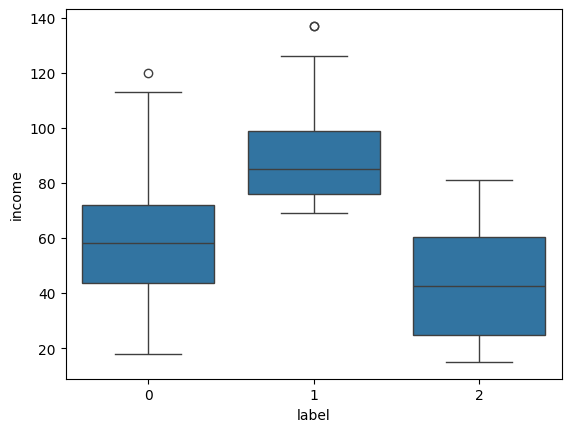

In [66]:
sns.boxplot(data=df_labeled, x='label', y='income')

In [75]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled.loc[:, ['age', 'income', 'spending_score']])
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['label'] = df_labeled['label']

In [76]:
pca_df

,PCA1,PCA2,label
0,-0.615720,-1.763481,2
1,-1.665793,-1.820747,2
2,0.337862,-1.674799,2
3,-1.456573,-1.772430,2
4,-0.038465,-1.662740,2
...,...,...,...
195,-1.093705,2.215577,1
196,0.800448,2.540748,1
197,-1.119709,2.445169,1
198,0.395411,2.946665,1


<Axes: xlabel='PCA1', ylabel='PCA2'>

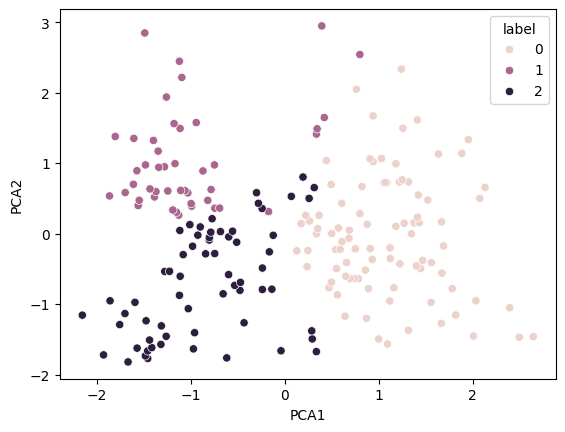

In [81]:
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='label')

In [77]:
kmeans.inertia_

295.96829569683854

In [78]:
wcss_list = [

]
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)

    wcss_list.append(kmeans.inertia_)

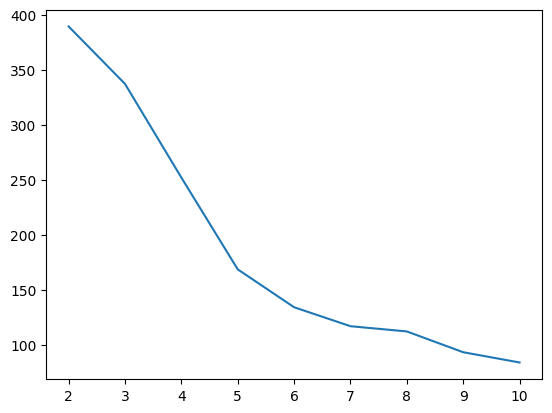

In [79]:
plt.plot(range(2, 11), wcss_list)

In [86]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_scaled)

KMeans(n_clusters=5)

In [87]:
df_labeled = df.copy()
df_labeled['label'] = kmeans.labels_
df_labeled

,age,income,spending_score,label
0,19,15,39,4
1,21,15,81,4
2,20,16,6,1
3,23,16,77,4
4,31,17,40,4
...,...,...,...,...
195,35,120,79,0
196,45,126,28,3
197,32,126,74,0
198,32,137,18,3


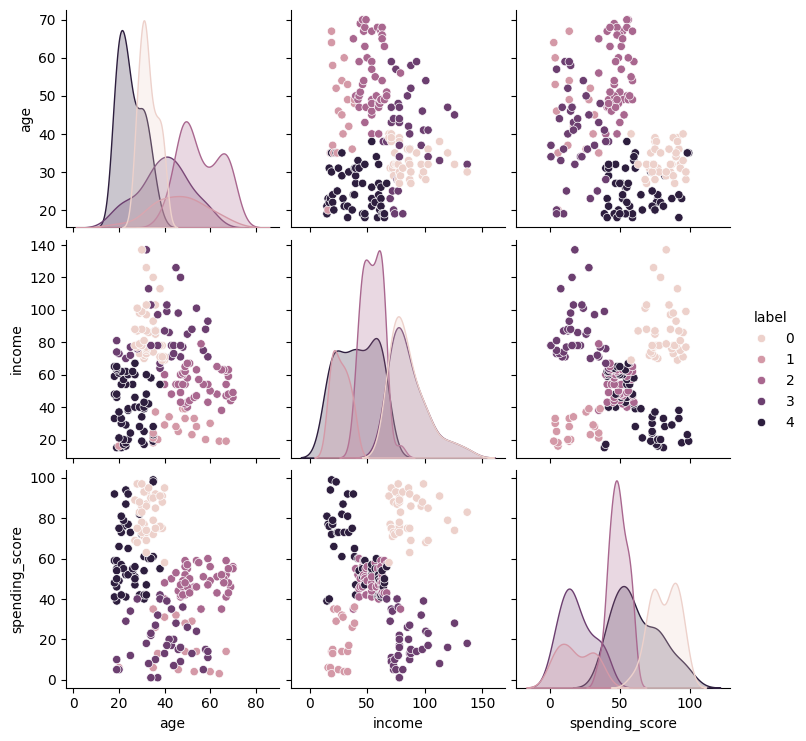

In [88]:
sns.pairplot(data=df_labeled, hue='label')

In [89]:
agglom = AgglomerativeClustering(n_clusters=5)
agglom.fit(df_scaled)

AgglomerativeClustering(n_clusters=5)

In [90]:
agglom.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [92]:
df_labeled = df.copy()
df_labeled['label'] = agglom.labels_
df_labeled

,age,income,spending_score,label
0,19,15,39,4
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4
...,...,...,...,...
195,35,120,79,2
196,45,126,28,3
197,32,126,74,2
198,32,137,18,3


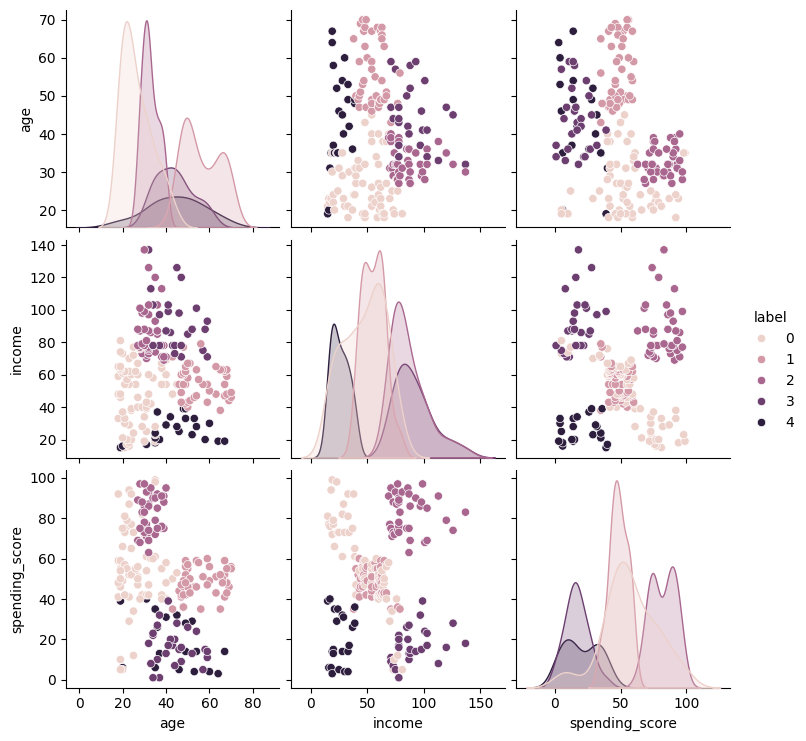

In [93]:
sns.pairplot(data=df_labeled, hue='label')

In [95]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

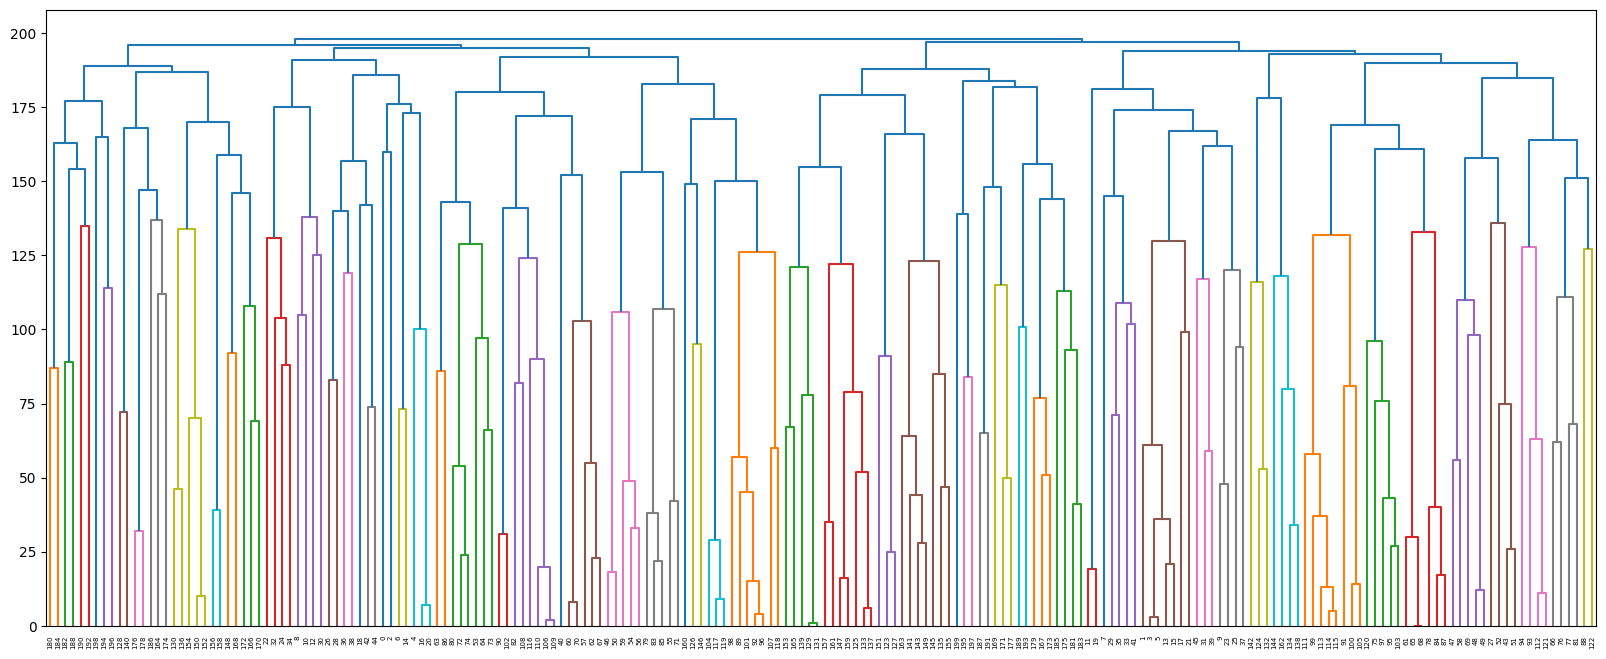

In [97]:
plt.figure(figsize=(20, 8))
plot_dendrogram(agglom)

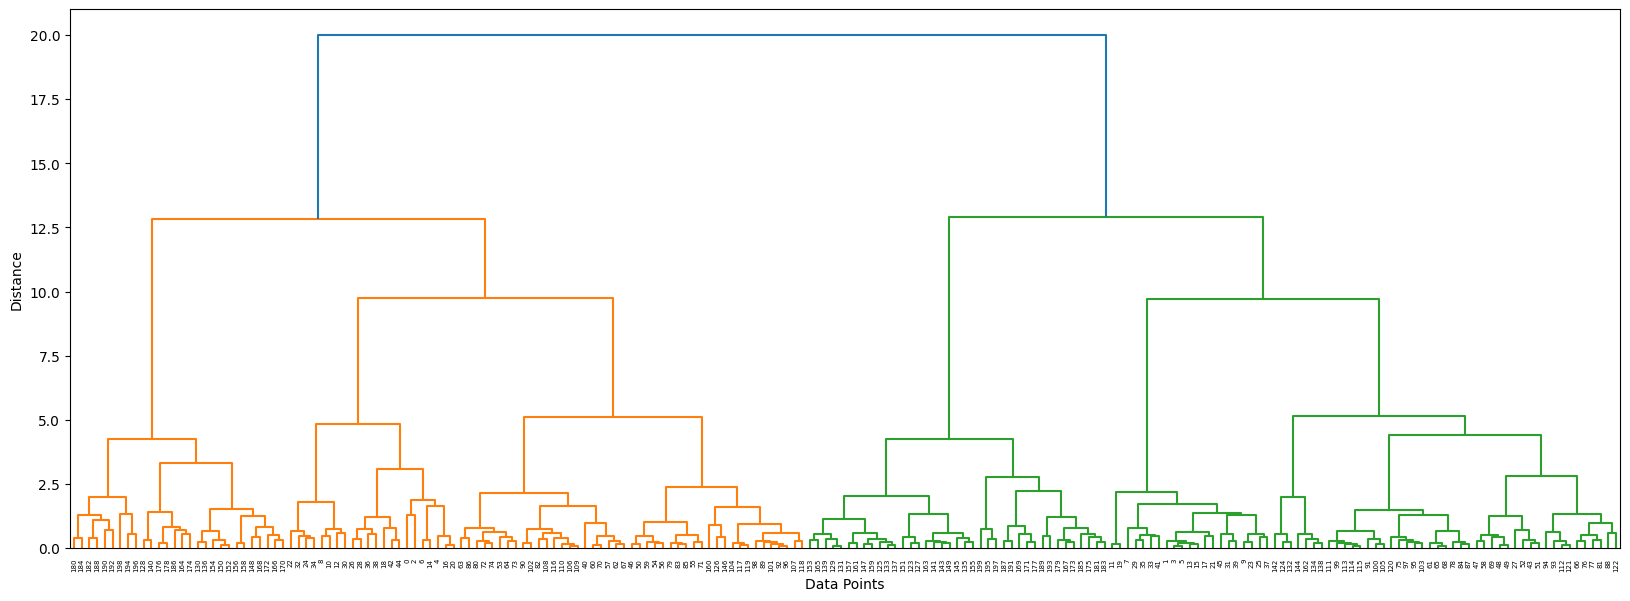

In [102]:
linkage_matrix = linkage(df_scaled, method='ward')

plt.figure(figsize=(20, 7))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [103]:
df.iloc[[106, 109]]

,age,income,spending_score
106,66,63,50
109,66,63,48


In [104]:
dbscan = DBSCAN(eps=0.5, min_samples=6) #min_samples = numarul de caracteristici in dataset inmultita la 2
dbscan.fit(df_scaled)

df_labeled = df.copy()
df_labeled['label'] = dbscan.labels_
df_labeled

,age,income,spending_score,label
0,19,15,39,-1
1,21,15,81,0
2,20,16,6,-1
3,23,16,77,0
4,31,17,40,-1
...,...,...,...,...
195,35,120,79,-1
196,45,126,28,-1
197,32,126,74,-1
198,32,137,18,-1


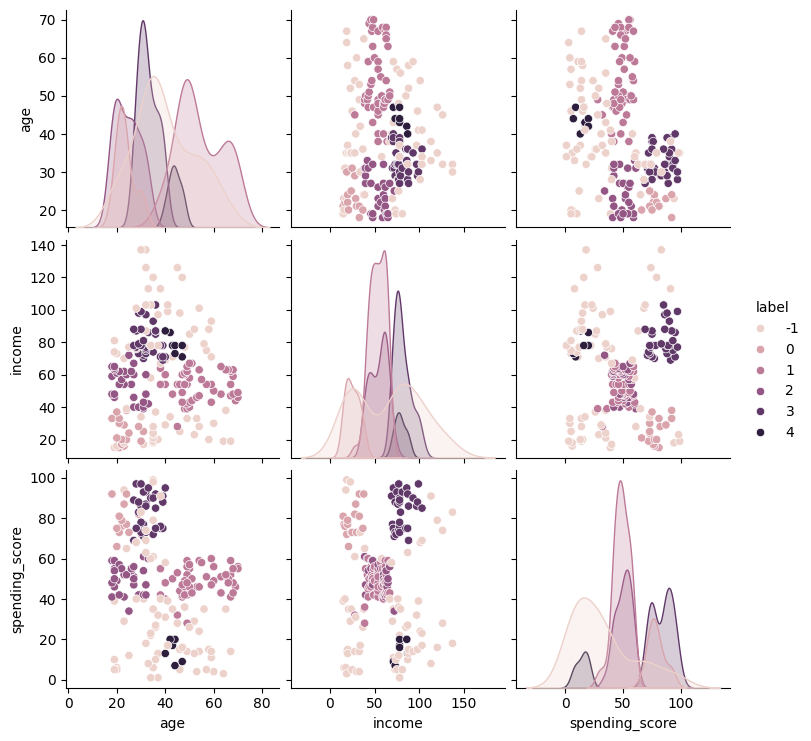

In [105]:
sns.pairplot(data=df_labeled, hue='label')

In [108]:
neighbors = NearestNeighbors(n_neighbors=6)
neighbors.fit(df_scaled)
distances, indices = neighbors.kneighbors(df_scaled)

In [114]:
sorted_values = sorted(distances.mean(axis=1))

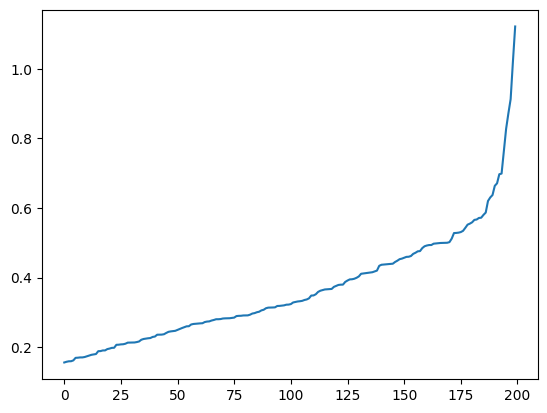

In [115]:
plt.plot(sorted_values)